# Introduction to Python Project : FoodHub Data Analysis

### Problem Statement


#### Description

##### Context
The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin on the delivery order from the restaurants.

 

#### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company improve its business. 

 


### Data Dictionary

The data contains the different data related to a food order. The detailed data dictionary is given below.

**order_id**: Unique ID of the order  
**customer_id**: ID of the customer who ordered the food  
**restaurant_name**: Name of the restaurant  
**cuisine_type**: Cuisine ordered by the customer  
**cost_of_the_order**: Price paid per order  
**day_of_the_week**: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)  
**rating**: Rating given by the customer out of 5  
**food_preparation_time**: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.  
**delivery_time**: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information.

### Let us start by importing the required libraries

In [1]:
# Write your code here to import necessary libraries for the project
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

### Understanding the structure of the data

In [2]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# Write your code here to read the data
data=pd.read_csv("C:\\Users\\punith yc\\Downloads\\foodhub_order.csv")

In [3]:
# Write your code here to view the first 5 rows
data.head(5)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [4]:
# Write your code here
data.shape

(1898, 9)

#### Observations: 
The foodhub orders dataset contains 1898 rows and 9 columns of data


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [5]:
# Write your code here
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
The datasets contains 3 integer columns, 1 float column and 4 object columns and all the columns dont have any null values and there are no duplicates in the data which means all the values are unique

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [6]:
# Write your code here
data.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
There are no missing values in the data across all the columns, so its not required to handle the missing values in the data

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [7]:
# Write your code here
data.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations:
1. The minimum time required to prepare food once the order placed is 20.00(in mins) 
2. The average time required to prepare food once the order placed is 2.737(in mins) 
3. The maximum time required to prepare food once the order placed is 35.00(in mins) 
4. There are 1898 unique customers and 1898 unique orders
5. The minimum time required to deliver the order once the food prepared is 15.00
6. The maximum time required to deliver the order once the food prepared is 33.00
6. The average time required to deliver the order once the food prepared is 2.41

### **Question 5:** How many orders are not rated? [1 mark]

In [8]:
# Write the code here
count=(data['rating'] == 'Not given').sum()
print(f"The number of orders are not rated are {count}")

The number of orders are not rated are 736


#### Observations:
The orders which are not rated are identified as "Not Given" and the total number of orders which are not rated are 736

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

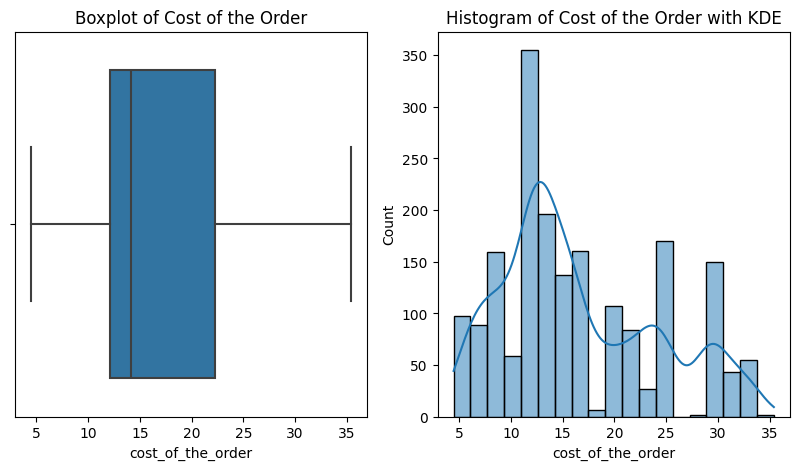

In [9]:
# Write the code here
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(data,x='cost_of_the_order')
plt.title('Boxplot of Cost of the Order')
plt.subplot(1,2,2)
sns.histplot(data,x='cost_of_the_order',kde=True)
plt.title('Histogram of Cost of the Order with KDE')
plt.show()

#### Observations:
From the distribution we can see that it's right skewed which means some of the orders are having high costs and the 25% of orders cost less than 15 and 75% orders cost less than 25 dollars and the median cost price of the orders is in between 13 and 15

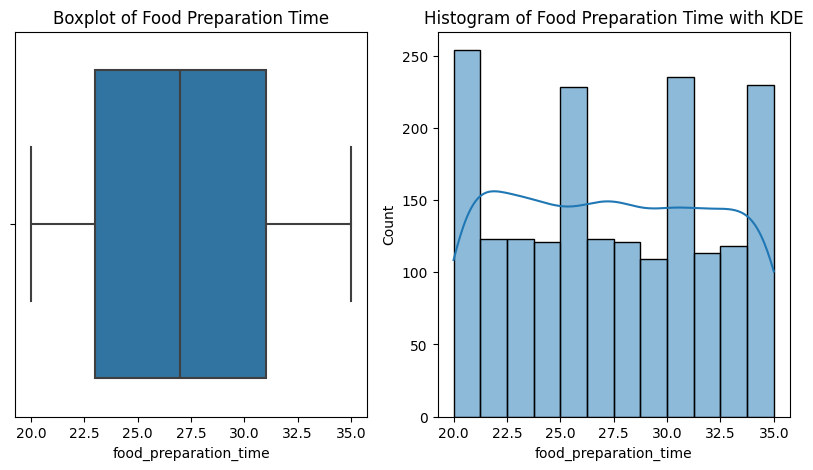

In [10]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(data=data, x='food_preparation_time')
plt.title('Boxplot of Food Preparation Time')
plt.subplot(1,2,2)
sns.histplot(data,x='food_preparation_time',kde=True)
plt.title('Histogram of Food Preparation Time with KDE')
plt.show()

#### Observations:
From the ditribution we can see that is almost normally distributed and 25% orders took food preparation time of less than 25 mins and 50% of the orders took less than 28 mins and the 75% of orders time taken to prepare the food is 31

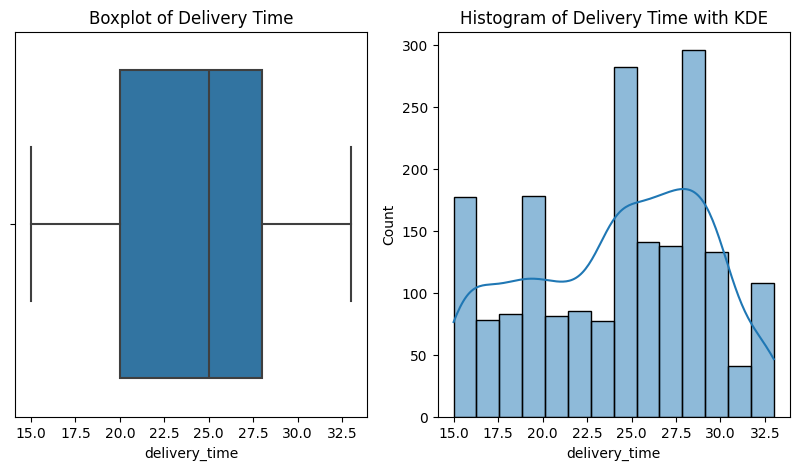

In [11]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(data,x='delivery_time')
plt.title('Boxplot of Delivery Time')
plt.subplot(1,2,2)
sns.histplot(data,x='delivery_time',kde=True)
plt.title('Histogram of Delivery Time with KDE')  
plt.show()

#### Observations:
From the above distribution we can understand that the distribution is left skewed which means most of the orders delivered within the less time once the order is placed and some of the orders took more time to deliver and 25% orders are delivered within the 25 minutes of order placed and the median took to deliver the orders is 25-26 mins and 75% orders are delivered within the time of 28-29 mins

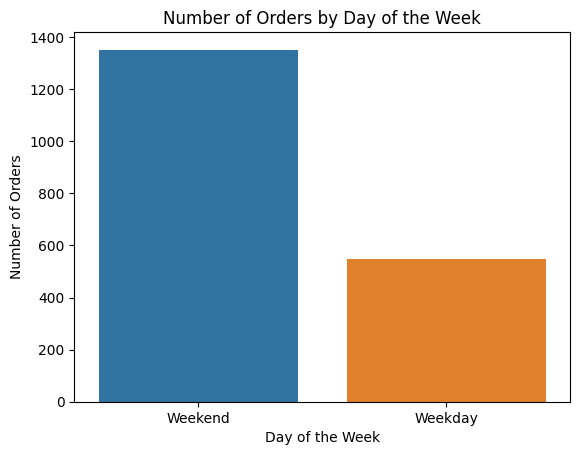

In [12]:
sns.countplot(data,x='day_of_the_week')
plt.title('Number of Orders by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.show()

#### Observations:
As the countplot says that most of the orders placed on weekends is 700-750 higher than compared to the orders placed on weekdays so it clearly suggests that most of the customers are preferred to order on weekends compared to weekdays

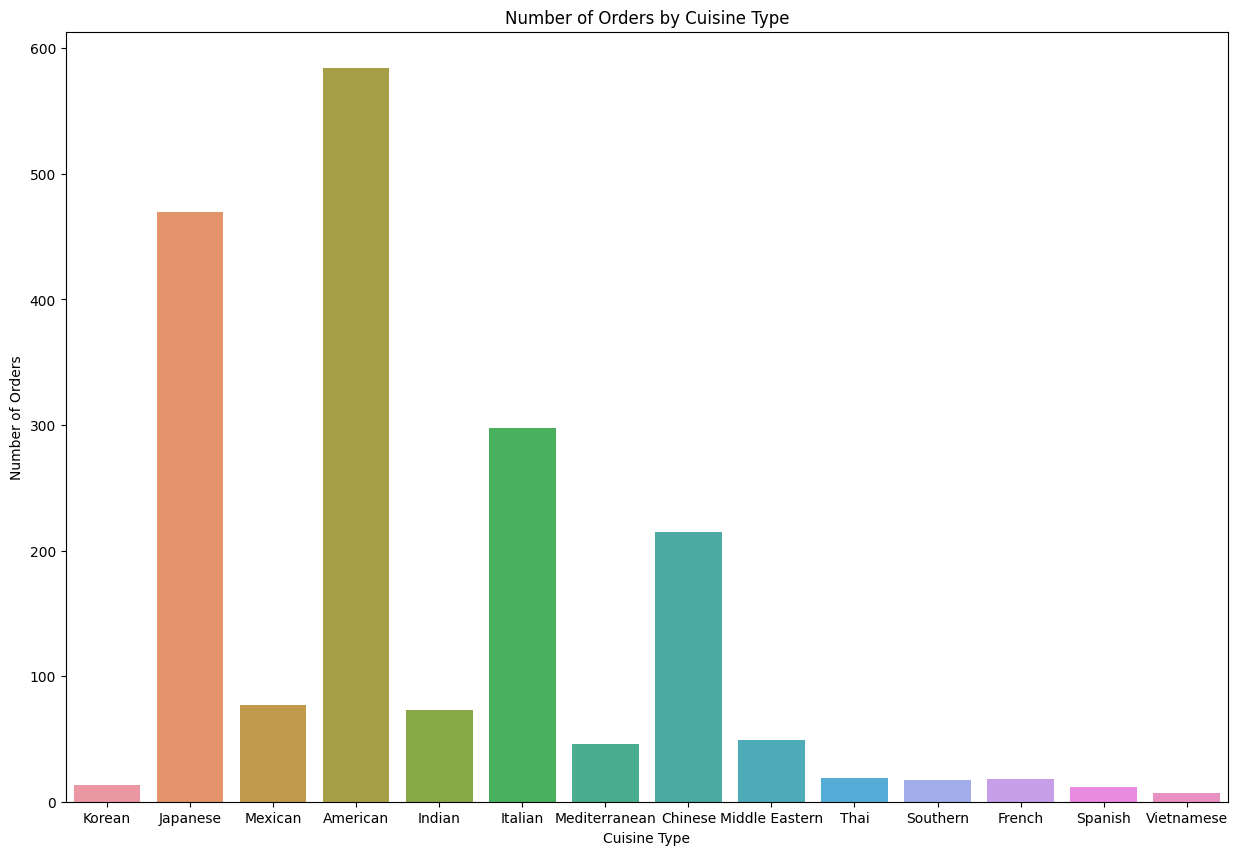

In [13]:
plt.figure(figsize=(15,10))
sns.countplot(data,x='cuisine_type')
plt.xlabel('Cuisine Type')
plt.ylabel('Number of Orders')
plt.title('Number of Orders by Cuisine Type')
plt.show()

#### Observations:
From this we can understand that most of the customers are preferring to order the american cuisine which is high nearly 600 and followed by japanes and italian in 2nd and 3rd most preferring cuisines and the least interested cuisines by the customers are vietnamese,apanish and korean

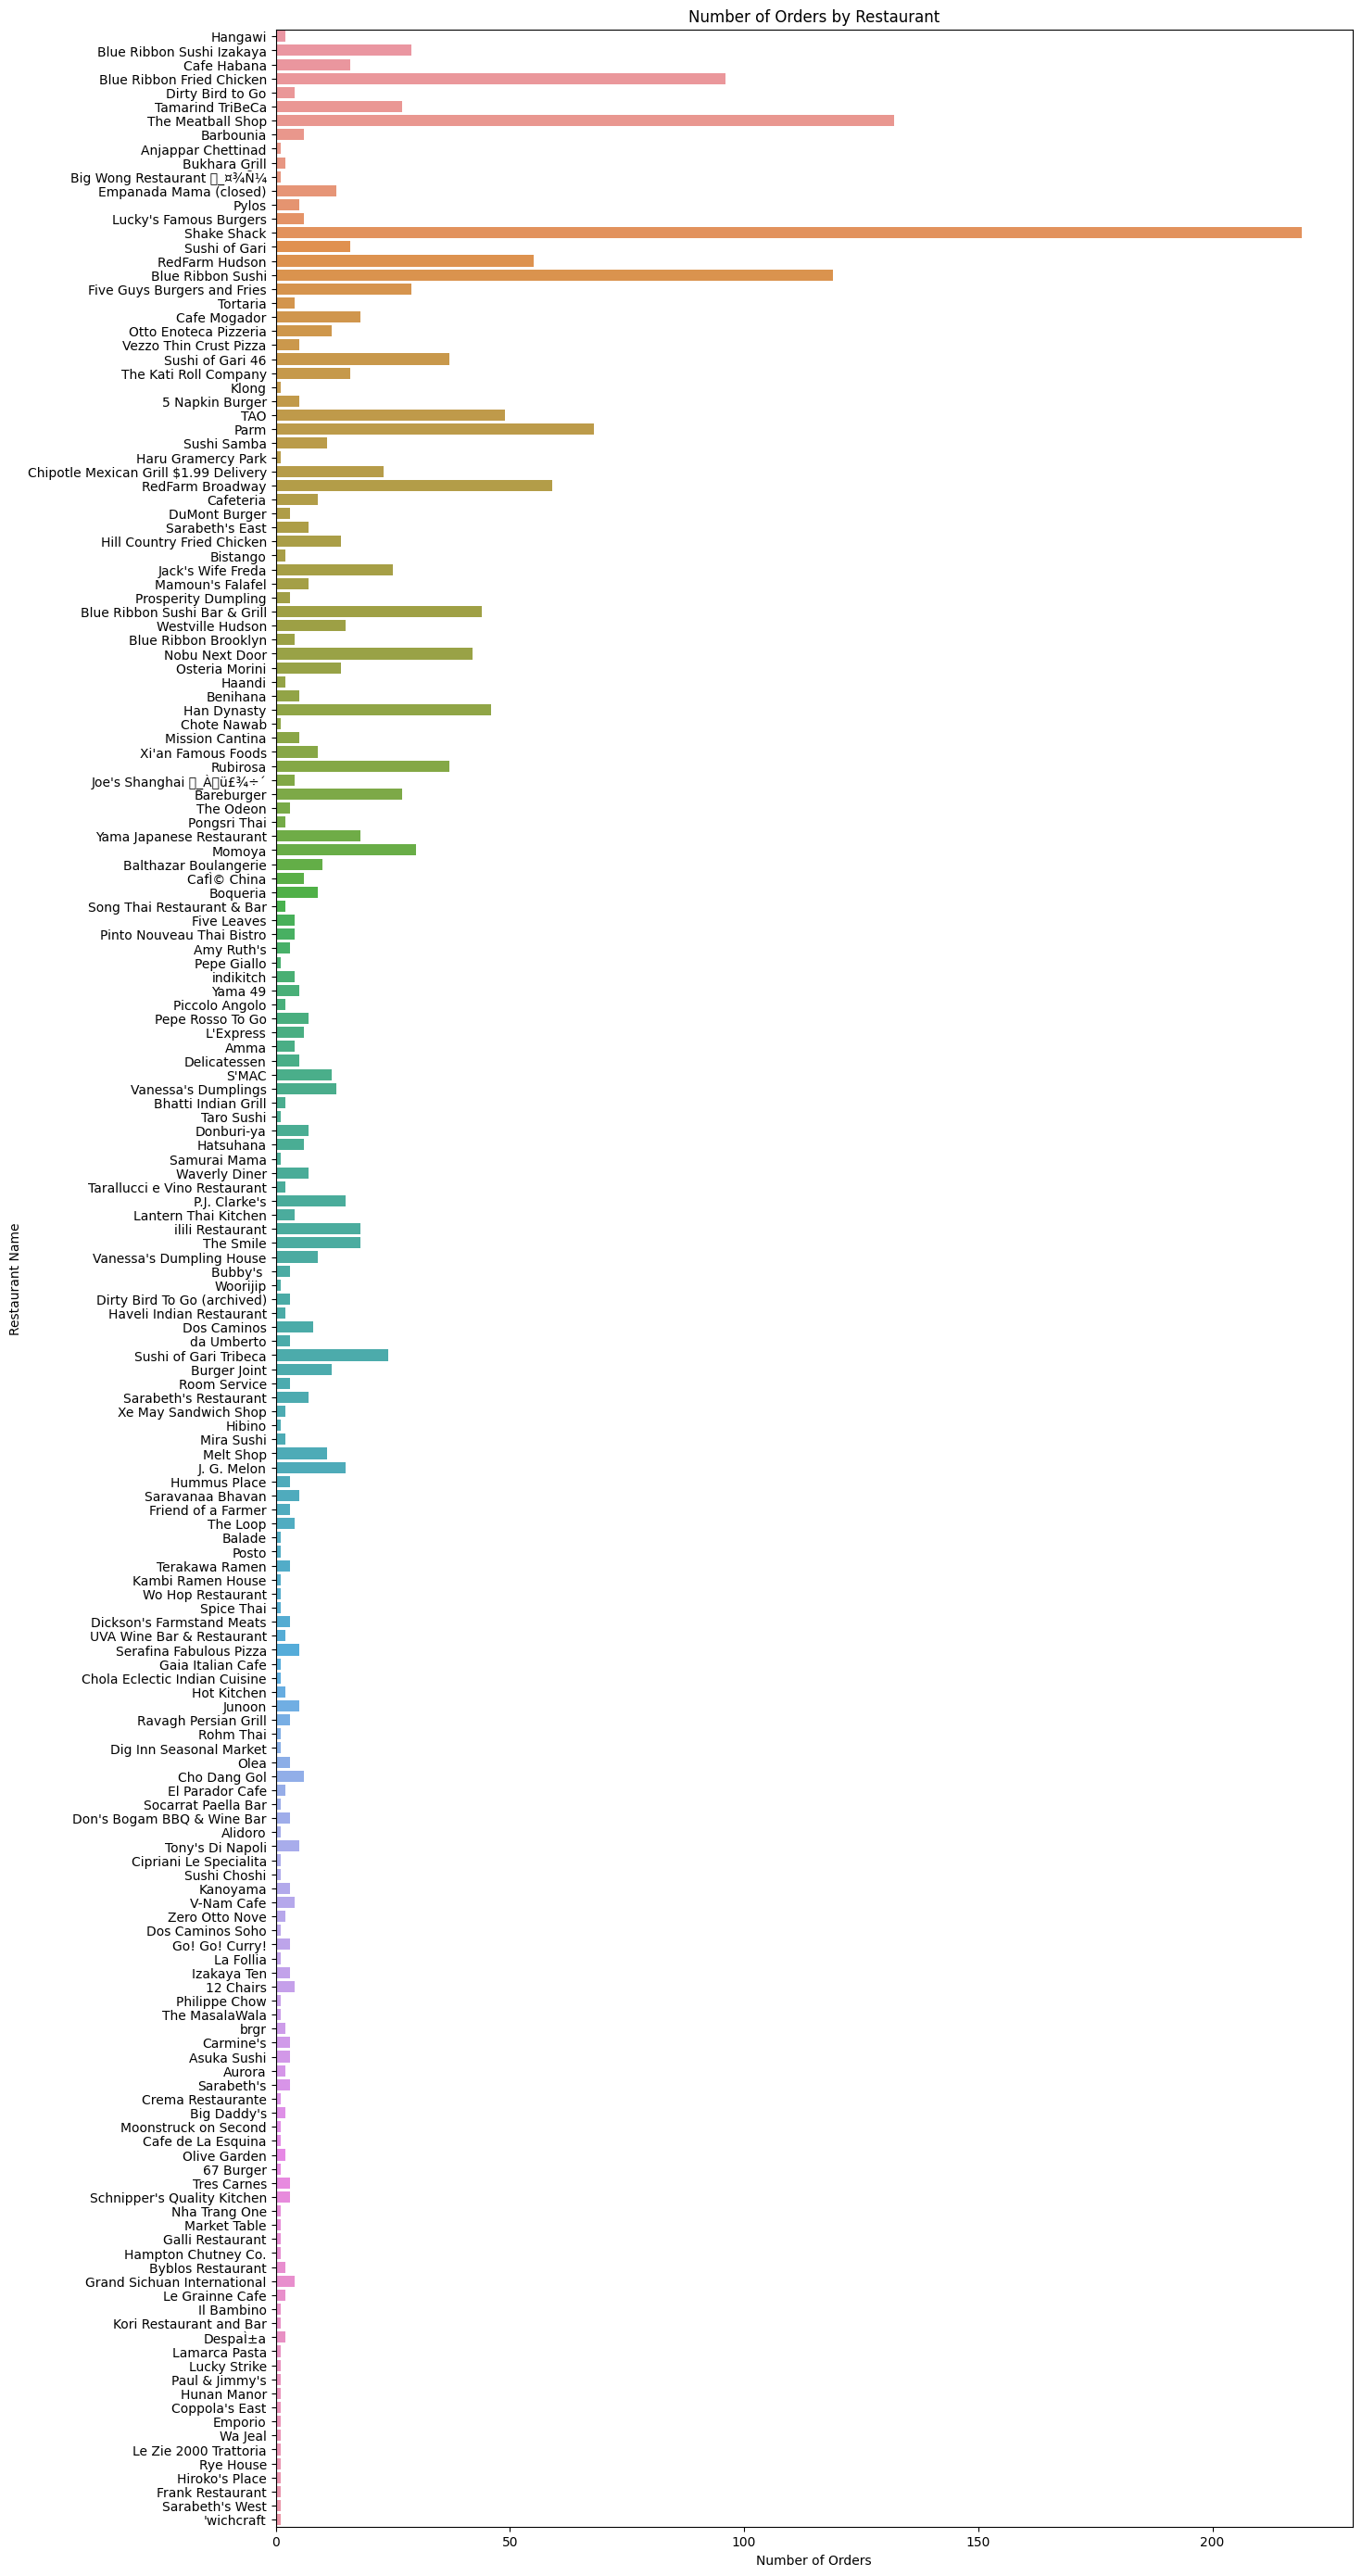

In [14]:
plt.figure(figsize=(15,35))
sns.countplot(data,y='restaurant_name')
plt.xlabel('Number of Orders')
plt.ylabel('Restaurant Name')
plt.title('Number of Orders by Restaurant')
plt.show()

#### Observations:
The most preferred restaurant by customers is Shake shack which is very high compared to all the other restaurants which suggests that the taste may be good and the prices they are charging may be reasonable and there may be many reasons for this

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [15]:
# Write the code here
data.groupby(['restaurant_name'])['order_id'].count().sort_values(ascending=False).head(5)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: order_id, dtype: int64

#### Observations:
The top 5 restaurants in terms of orders are shake shack,The metalball shop,Blue Ribbon Sushi,Blue ribbons fried chicken,parm


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [16]:
# Write the code here
temp_data=data[data['day_of_the_week']=='Weekend']
temp_data.groupby(['cuisine_type'])['order_id'].count().sort_values(ascending=False).head(1)

cuisine_type
American    415
Name: order_id, dtype: int64

#### Observations:
The most popular cuisine weekends and the customers are most interested in weekends are the american with 415 orders


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [17]:
# Write the code here
temp_data=data[data['cost_of_the_order']>20]
print(f"The percentage of orders that cost more than 20 dollars is {(len(temp_data)/len(data))*100:.2f}%")


The percentage of orders that cost more than 20 dollars is 29.24%


#### Observations:
There are 555 orders out of 1898 orders where the price of the order is greater than 20 dollars and the percentage is 29.24%

### **Question 10**: What is the mean order delivery time? [1 mark]

In [18]:
# Write the code here
data['delivery_time'].mean()

24.161749209694417

#### Observations:
The average time taken to deliver 1898 orders is 24.161(mins)

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [19]:
# Write the code here
#data.groupby(['customer_id'])['order_id'].count().sort_values(ascending=False).head(3)
data['customer_id'].value_counts().head(3)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations:
The customers who can receive 20% discount vouchers with customer_id's are 52832,47440,83287 as they are ordering the food very frequently

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


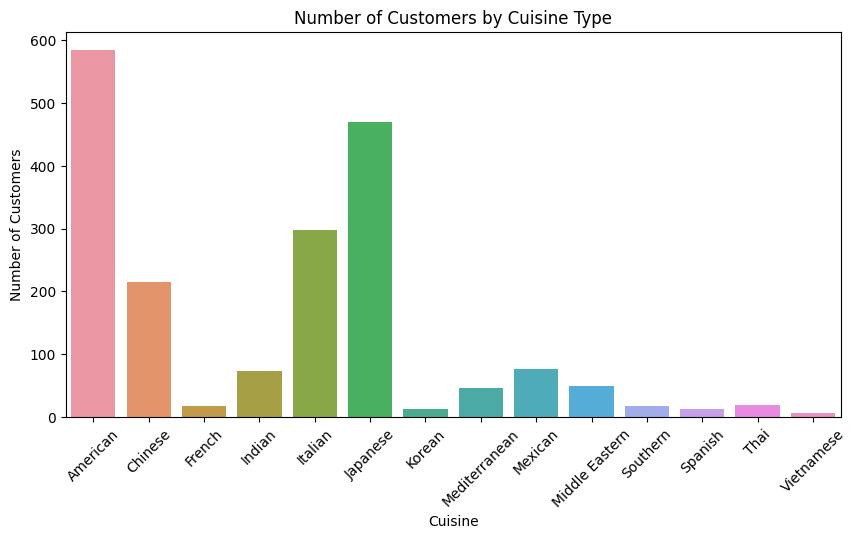

In [20]:
# Customers with most preferred cuisine_type

total_orders = data.groupby('cuisine_type')['customer_id'].count().reset_index()
plt.figure(figsize=(10, 5))
sns.barplot(data=total_orders, x='cuisine_type', y='customer_id')
plt.ylabel('Number of Customers')
plt.xlabel('Cuisine')
plt.title('Number of Customers by Cuisine Type')
plt.xticks(rotation=45)
plt.show()

#### Observations:
More than 500 customers are interested in american cuisine type which is most preferred and the cuisines followed by japanese and italian in 2nd and 3rd the most less preferred cuisne type is vietnamese

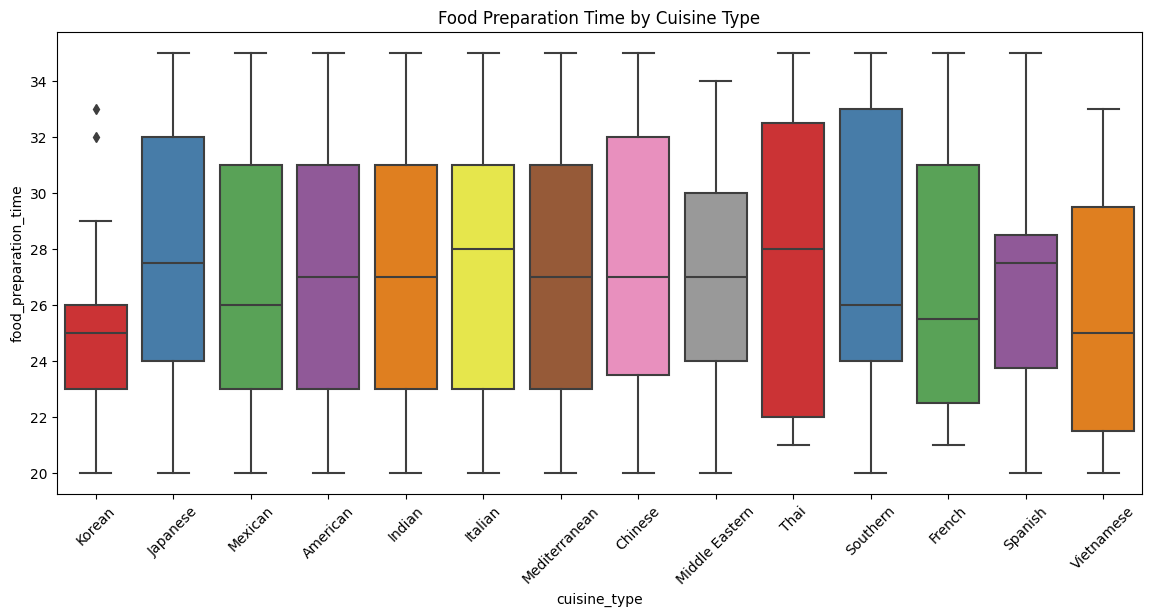

In [21]:
# preparation time taken by each cuisine type

plt.figure(figsize=(14, 6))
sns.boxplot(x='cuisine_type', y='food_preparation_time', data=data, palette='Set1')
plt.xticks(rotation=45)
plt.title('Food Preparation Time by Cuisine Type')
plt.show()


#### Observations:

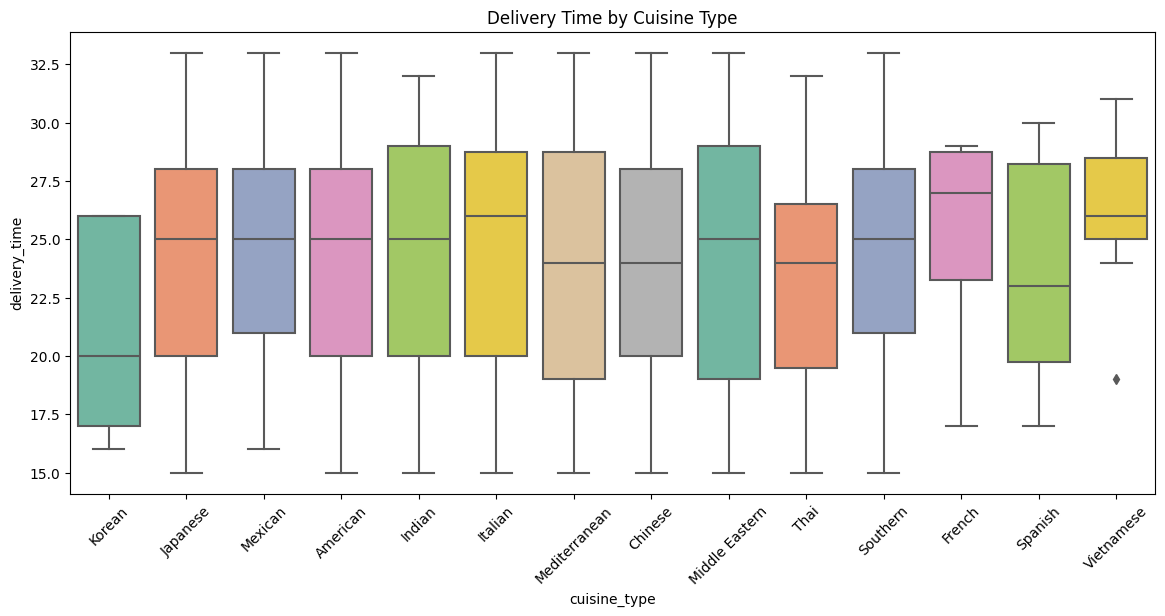

In [22]:
# delivery time taken to deliver each cuisine type

plt.figure(figsize=(14, 6))
sns.boxplot(x='cuisine_type', y='delivery_time', data=data,palette='Set2')
plt.xticks(rotation=45)
plt.title('Delivery Time by Cuisine Type')
plt.show()

#### Observations:

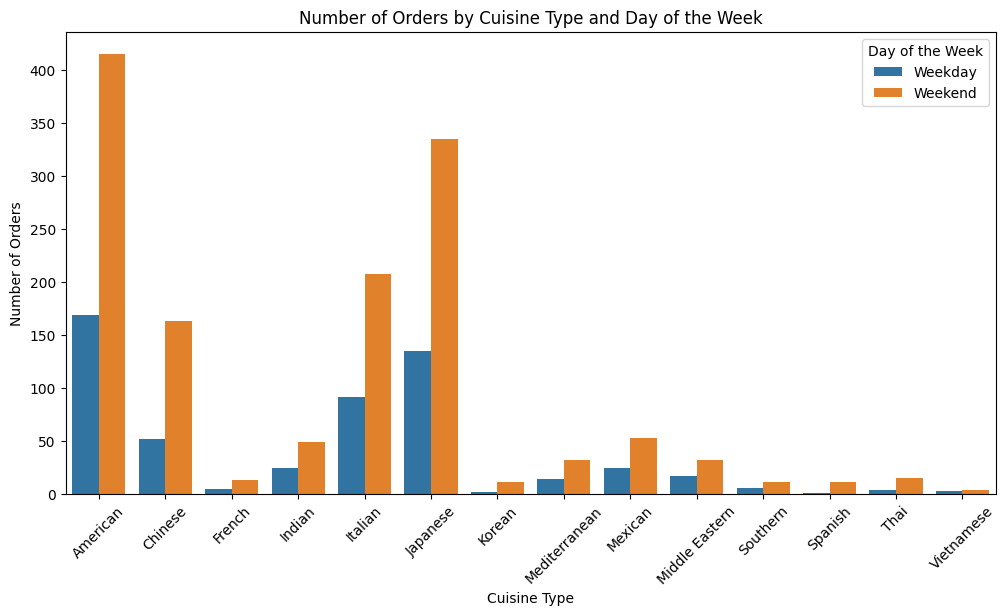

In [23]:
# number of orders by cuisine type and day of the week

order_counts = data.groupby(['cuisine_type', 'day_of_the_week']).size().reset_index(name='order_count')
plt.figure(figsize=(12, 6))
sns.barplot(data=order_counts, x='cuisine_type', y='order_count', hue='day_of_the_week')
plt.xticks(rotation=45)
plt.title('Number of Orders by Cuisine Type and Day of the Week')
plt.xlabel('Cuisine Type')
plt.ylabel('Number of Orders')
plt.legend(title='Day of the Week')
plt.show()



#### Observations:
The number of orders on weeekend as well for weekdays are more for american cuisine types copmared to other cuisine and followed by japanese and italian cuisines which got most orders and the number of orders for weekend as well as weekdays is less for vietnamese


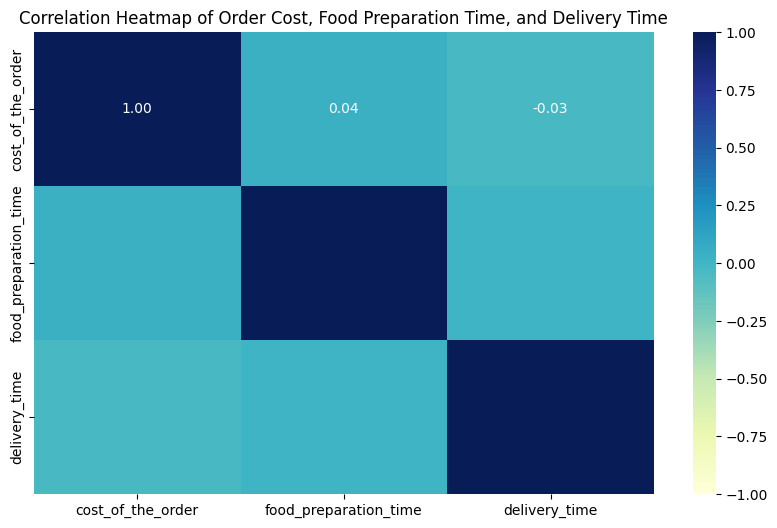

,cost_of_the_order,food_preparation_time,delivery_time
cost_of_the_order,1.000000,0.041527,-0.029949
food_preparation_time,0.041527,1.000000,0.011094
delivery_time,-0.029949,0.011094,1.000000


In [24]:
# Write the code here
x = data[['cost_of_the_order', 'food_preparation_time', 'delivery_time']]
plt.figure(figsize=(10, 6))
sns.heatmap(x.corr(), annot=True, fmt='.2f', vmin=-1, vmax=1, cmap="YlGnBu")
plt.title('Correlation Heatmap of Order Cost, Food Preparation Time, and Delivery Time')
plt.show()
x.corr()

#### Observations:
Food preparation time and the cost of the order is positively correlated with the magnitude of 0.41 and delivery time and the cost of the order is negatively correlated with the magnitude of -0.029

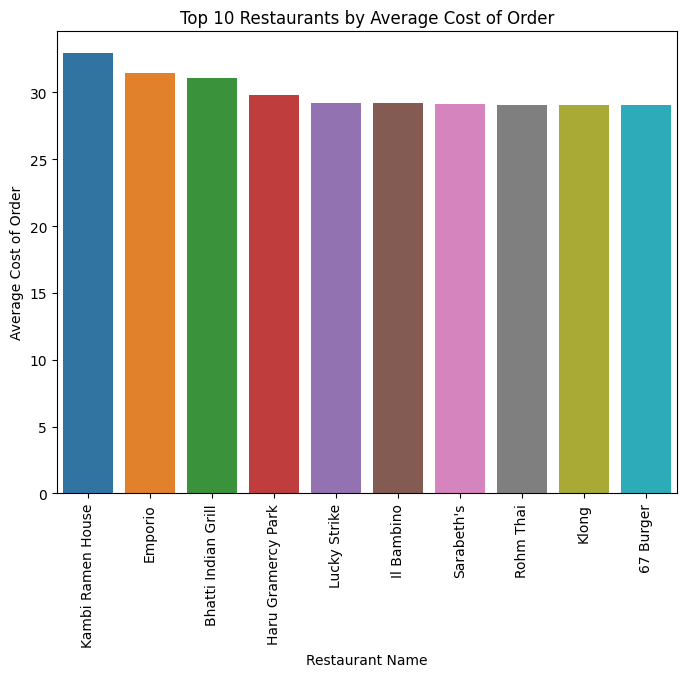

In [25]:
# Top 10 restaurants with average cost of order

plt.figure(figsize=(8, 6))
avg_cost = data.groupby('restaurant_name')['cost_of_the_order'].mean().sort_values(ascending=False).reset_index().head(10)
sns.barplot(data=avg_cost, x='restaurant_name', y='cost_of_the_order')
plt.xticks(rotation=90)
plt.title('Top 10 Restaurants by Average Cost of Order')
plt.xlabel('Restaurant Name')
plt.ylabel('Average Cost of Order')
plt.show()


#### Observations:
The average cost of the order in Kambi ramen house is high compared to all the other resturants which is above 30 dollars and then the emporio is charging above 30 dollars which is in second place

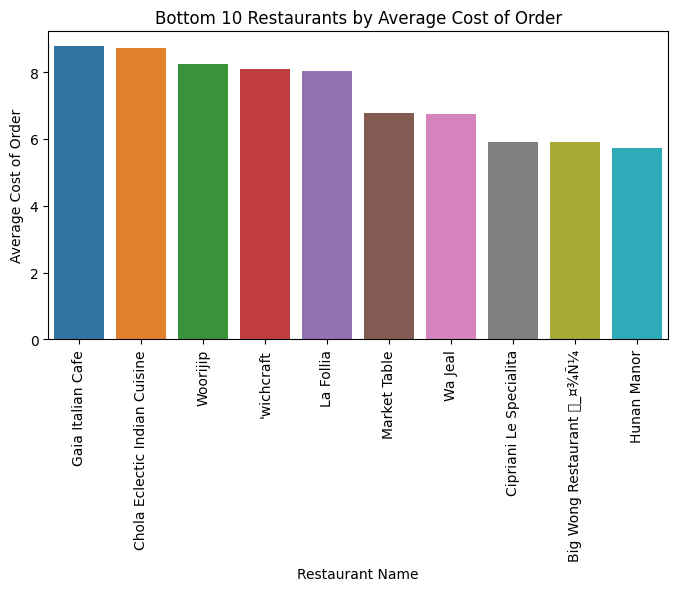

In [26]:
# below 10 restaurants with average cost of order

plt.figure(figsize=(8, 4))
avg_cost = data.groupby('restaurant_name')['cost_of_the_order'].mean().sort_values(ascending=False).reset_index().tail(10)
sns.barplot(data=avg_cost, x='restaurant_name', y='cost_of_the_order')
plt.xticks(rotation=90)
plt.title('Bottom 10 Restaurants by Average Cost of Order')
plt.xlabel('Restaurant Name')
plt.ylabel('Average Cost of Order')
plt.show()

#### Observations:
The average cost of the order for the restaurant hunan manor is less compared to all the restaurants which is nearly 6 dollars and followed by big wong restaurant and cipriani specialita

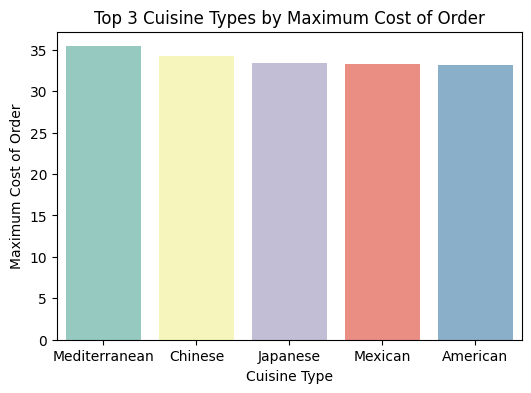

In [27]:
#top 5 cuisine types by maximum cost

temp_data = data.groupby('cuisine_type')['cost_of_the_order'].max().sort_values(ascending=False).reset_index().head(5)
plt.figure(figsize=(6, 4))
sns.barplot(data=temp_data, x='cuisine_type', y='cost_of_the_order', palette='Set3')
plt.title('Top 3 Cuisine Types by Maximum Cost of Order')
plt.xlabel('Cuisine Type')
plt.ylabel('Maximum Cost of Order')
plt.show()

#### Observations:
The maximum price charged for each cuisine type is higher for mediterranean which is nearly 36 dollars and then the 2nd max price is charged by chinese which is 35 and then followed by japanese,mexican and american

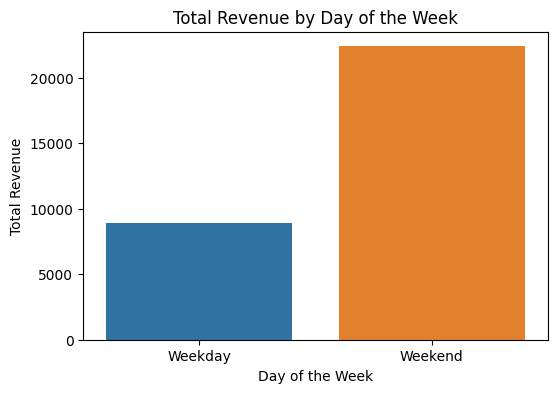

In [28]:
# total revenue generated on weekends vs weekdays

avg_revenue = data.groupby('day_of_the_week')['cost_of_the_order'].sum().reset_index()
plt.figure(figsize=(6,4))
sns.barplot(data=avg_revenue, x='day_of_the_week', y='cost_of_the_order')
plt.title('Total Revenue by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Revenue')
plt.show()



#### Observations:
The total revenue for weekends is nearly 25000 which is higher than the weekdays which is nearly 9000-10000 so from this we can understand that the most of the orders are placed on weekends than the weekdays so that the most of the restaurants generating are more income on weekends

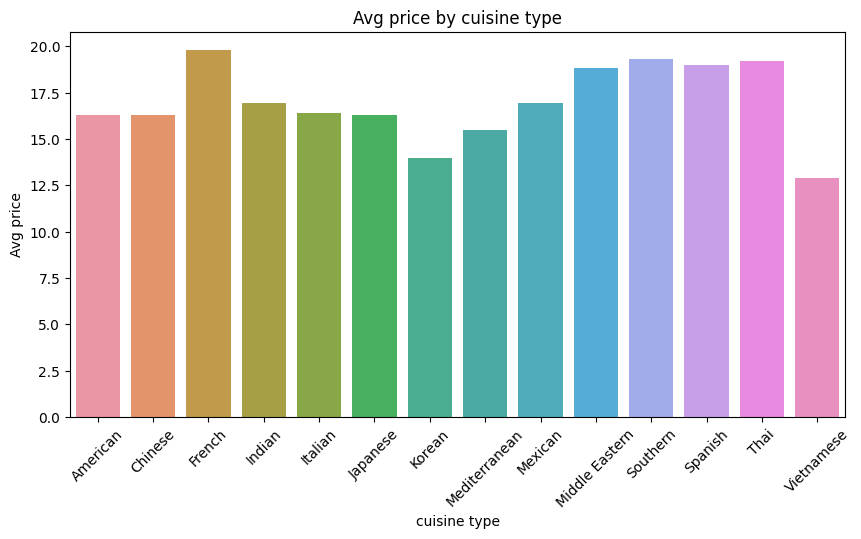

In [29]:
#Avg price by cuisine type

result=data.groupby(['cuisine_type'])['cost_of_the_order'].mean().reset_index()
plt.figure(figsize=(10,5))
sns.barplot(result,x='cuisine_type',y='cost_of_the_order')
plt.xticks(rotation=45)
plt.title("Avg price by cuisine type")
plt.xlabel('cuisine type')
plt.ylabel('Avg price')
plt.show()

#### Observations:
The avg price for the cuisine type for french is higher which is nearly 20 dollars and the avg price for cuisine type is lesser which is nearly 13 dollars

NameError: name 'aplt' is not defined

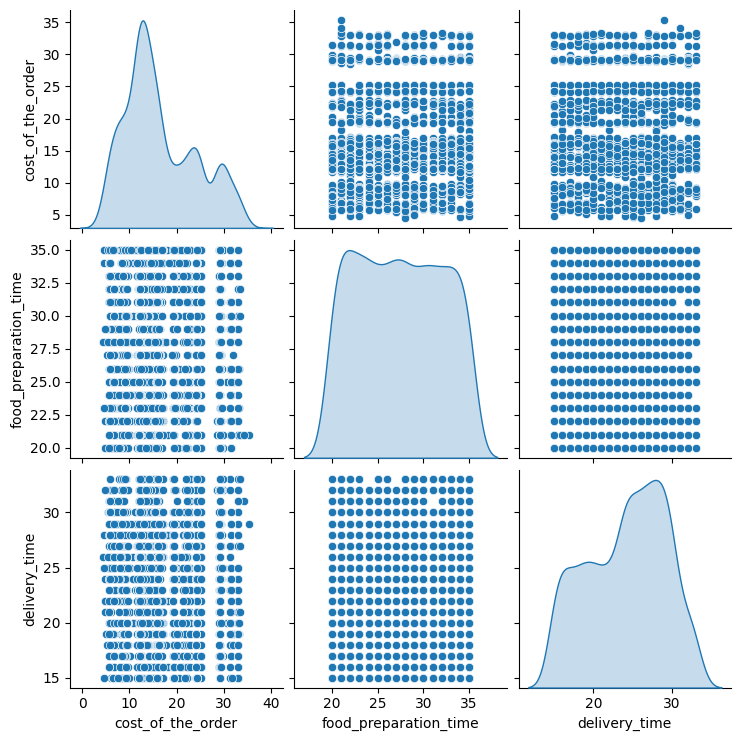

In [30]:
numerical_data = data[['cost_of_the_order', 'rating', 'food_preparation_time', 'delivery_time']]
sns.pairplot(numerical_data, diag_kind='kde')
aplt.suptitle('Pairplot of Numerical Data', y=1.02)
plt.show()


#### Observations: 
The cost of the order is right skewed and the food preparation time is almost normally distributed and delivery time is sightly left skewed and there is some positive correlation between the cost of the order and the delivery time and there is no strong relationship between the food preparation time, the delivery time and the food preparation time and the cost of the order

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Write the code here
# Assuming you have already imported pandas as pd and your DataFrame is named `data`
temp_data=data[data['rating'] != 'Not given']
result = temp_data.groupby(['restaurant_name'])['rating'].agg(['count', 'mean']).sort_values(by='count',ascending=False)
final_result = result[(result['count'] > 50) & (result['mean'] > 4)]
final_result

#### Observations:
The restaruants which are eligible to get the promotional offer by fullfilling the criteria of company are shake Shack,The metaball shop,blue ribbon sushi and the blue ribbon fried chicken

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [31]:
# Write the code here
revenue_above_20=data[data['cost_of_the_order'] > 20]['cost_of_the_order']*0.25
revenue_above_5 = data[(data['cost_of_the_order'] > 5) & (data['cost_of_the_order'] <= 20)]['cost_of_the_order'] * 0.15
print(sum(revenue_above_20))
print(sum(revenue_above_5))
sum(revenue_above_5)+sum(revenue_above_20)


3688.7275000000027
2477.5755000000036


6166.303000000006

#### Observations:
The revenue generated by the company for orders having cost more than 20 dollars is 3688.72 and for having cost more than 5 dollars and less than or equal to 20 dollars is 2477 and the combined revenue generated by company for all the orders is 6166.30 dollars 


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [32]:
# Write the code here
data['Total_time']=data['food_preparation_time']+data['delivery_time']
print(f"The percentage of orders take more than 60 minutes to get delivered {(len(data[data['Total_time']>60])/len(data))*100:.2f}%")

The percentage of orders take more than 60 minutes to get delivered 10.54%


#### Observations:
The delivery time can be calculated by summing the time required to prepared the food once the order is placed with the time required to deliver once the food is prepared. There are nearly 200 orders which took more than 60 mins to deliver the food from the time of order, the percentage of orders which took more than 60 mins is 10.54% and rest of the orders took less than 60 minutes to deliver the order

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [33]:
# Write the code here
temp_data=data[data['day_of_the_week']=='Weekend']
temp_data1=data[data['day_of_the_week']=='Weekday']

print(f"The mean delivery time for weekends is {temp_data['delivery_time'].mean():.2f} and for weekdays is {temp_data1['delivery_time'].mean():.2f}")

The mean delivery time for weekends is 22.47 and for weekdays is 28.34


#### Observations:
The mean by delivery time taken by the delivery partners on weekends is 22.47(mins) and the  mean delivery time taken on weekdays to deliver is 28.34 which is slightly higher compared to weekends and the difference between them is nearly 6(mins)

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  American cuisine is the most ordered cuisine type with nearly 600 orders
* Japanese and italian cuisines are the 2nd and 3rd most ordered cuisine types
* the least ordered cuisine types are vietanamese,spanish and korean
* American,Japanese and italian have higher ratings as they are most preferred cuisines
* there is some correlation between longer delivery times and lower ratings as they took longer time to delivered  and tend to receive lower feedback
* Cuisines like Vietnamese, Spanish, and Korean have fewer orders and lower ratings This indicates the possible issues with food quality, delivery times and other reasons

### Recommendations:

*  Encourage customers to provide ratings, especially for cuisines that are less popular, to better understand why they are underperforming
* For less popular cuisines (e.g., Vietnamese, Spanish, Korean), it may be helpful to run promotions to raise awareness and attract customers and providing the deals and discounts to increase the sales based on the day of the week
* assigning the dedicated customer support for solving the problems very quickly with common issues (e.g., late delivery, poor food quality)
* Analyze the data to identify peak order times and ensure enough delivery personnel are available during those periods
* Identifying and improving the areas with food preparation quality,packing and the delivery times